In [ ]:
# !pip install transformers
# !pip install pillow
# !pip install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cpu
# !pip install 'accelerate==0.26.0'

In [ ]:
# !pip install "paddleocr>=2.0.1" -i https://mirror.baidu.com/pypi/simple
# # !pip install "paddleocr>=2.0.1"

In [1]:
from paddleocr import PaddleOCR
# from PIL import Image
# import numpy as np
# import os
# from pathlib import Path

# Initialize PaddleOCR
# Set use_gpu=False for CPU
ocr = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False)

# def read_digital_display(image_path):
#     # Read image
#     result = ocr.ocr(image_path)
    
#     # Store results
#     readings = []
    
#     # Extract text and confidence
#     if result:
#         for line in result:
#             for item in line:
#                 text = item[1][0]  # The detected text
#                 confidence = item[1][1]  # Confidence score
#                 readings.append({
#                     'text': text,
#                     'confidence': confidence
#                 })
#     return readings

# def process_folder(folder_path):
#     # Get all image files
#     image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp')
#     image_files = [
#         f for f in Path(folder_path).iterdir() 
#         if f.suffix.lower() in image_extensions
#     ]
    
#     # Process each image and store results
#     results = {}
#     for img_path in image_files:
#         print(f"\nProcessing: {img_path.name}")
#         readings = read_digital_display(str(img_path))
#         results[img_path.name] = readings
        
#         # Print results for this image
#         if readings:
#             for reading in readings:
#                 print(f"Text: {reading['text']}, Confidence: {reading['confidence']:.2f}")
#         else:
#             print("No text detected")
    
#     return results

# Use the function
# folder_path = "./images"
# results = process_folder(folder_path)

[2025/01/15 02:34:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/paulc1/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/paulc1/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_

In [2]:
from PIL import Image
import numpy as np
import os
from pathlib import Path

def read_digital_display(image_path):
    # Read image
    result = ocr.ocr(image_path)
    readings = []
    
    # Extract text and confidence
    if result and result[0]:  # Check if result exists and has content
        for line in result[0]:  # Access first element of result
            try:
                text = line[1][0]  # The detected text
                confidence = line[1][1]  # Confidence score
                readings.append({
                    'text': text,
                    'confidence': confidence
                })
            except (IndexError, TypeError) as e:
                print(f"Error processing result: {e}")
                continue
    return readings

def process_folder(folder_path):
    # Get all image files
    image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp')
    image_files = [
        f for f in Path(folder_path).iterdir() 
        if f.suffix.lower() in image_extensions
    ]
    
    # Process each image and store results
    results = {}
    for img_path in image_files:
        print(f"\nProcessing: {img_path.name}")
        try:
            readings = read_digital_display(str(img_path))
            results[img_path.name] = readings
            image = Image.open(img_path)
            display(image)
            
            # Print results for this image
            if readings:
                for reading in readings:
                    print(f"Text: {reading['text']}, Confidence: {reading['confidence']:.2f}")
            else:
                print("No text detected")
        except Exception as e:
            print(f"Error processing {img_path.name}: {e}")
            results[img_path.name] = []
    
    return results


Processing: gauge-7.jpeg
[2025/01/15 02:34:12] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.0230100154876709
[2025/01/15 02:34:12] ppocr DEBUG: cls num  : 1, elapsed : 0.00683903694152832
[2025/01/15 02:34:12] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0762789249420166


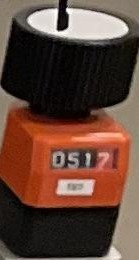

Text: 0517, Confidence: 0.91

Processing: gauge-6.jpeg
[2025/01/15 02:34:12] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.026447057723999023
[2025/01/15 02:34:12] ppocr DEBUG: cls num  : 2, elapsed : 0.009072065353393555
[2025/01/15 02:34:12] ppocr DEBUG: rec_res num  : 2, elapsed : 0.14524292945861816


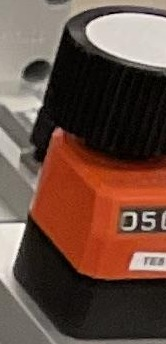

Text: 05, Confidence: 0.98
Text: TES, Confidence: 0.72

Processing: gauge-1.jpeg
[2025/01/15 02:34:12] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.02878117561340332
[2025/01/15 02:34:12] ppocr DEBUG: cls num  : 1, elapsed : 0.004859209060668945
[2025/01/15 02:34:12] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07443904876708984


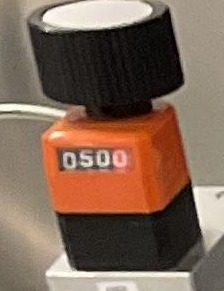

Text: 0500, Confidence: 0.99

Processing: gauge-3.jpeg
[2025/01/15 02:34:12] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019076824188232422
[2025/01/15 02:34:12] ppocr DEBUG: cls num  : 1, elapsed : 0.0052831172943115234
[2025/01/15 02:34:12] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0734872817993164


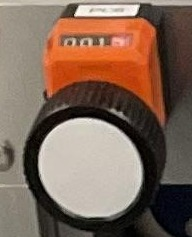

No text detected

Processing: gauge-2.jpeg
[2025/01/15 02:34:12] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.046189069747924805
[2025/01/15 02:34:12] ppocr DEBUG: cls num  : 2, elapsed : 0.009160280227661133
[2025/01/15 02:34:12] ppocr DEBUG: rec_res num  : 2, elapsed : 0.14434480667114258


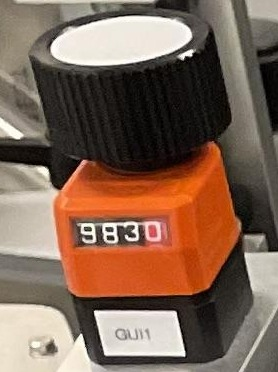

Text: 9830, Confidence: 0.99
Text: GUI, Confidence: 0.70

Processing: gauge-9.jpeg
[2025/01/15 02:34:12] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.019520044326782227
[2025/01/15 02:34:12] ppocr DEBUG: cls num  : 1, elapsed : 0.004948854446411133
[2025/01/15 02:34:12] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07262325286865234


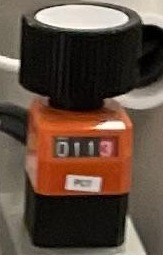

Text: 0113, Confidence: 0.89

Processing: gauge-5.jpeg
[2025/01/15 02:34:12] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.03705596923828125
[2025/01/15 02:34:13] ppocr DEBUG: cls num  : 2, elapsed : 0.009305953979492188
[2025/01/15 02:34:13] ppocr DEBUG: rec_res num  : 2, elapsed : 0.1872267723083496


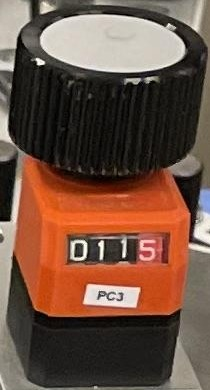

Text: 0115, Confidence: 0.96
Text: PC3, Confidence: 0.98

Processing: gauges-10.jpeg
[2025/01/15 02:34:13] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.08539009094238281
[2025/01/15 02:34:13] ppocr DEBUG: cls num  : 2, elapsed : 0.009145975112915039
[2025/01/15 02:34:13] ppocr DEBUG: rec_res num  : 2, elapsed : 0.14329791069030762


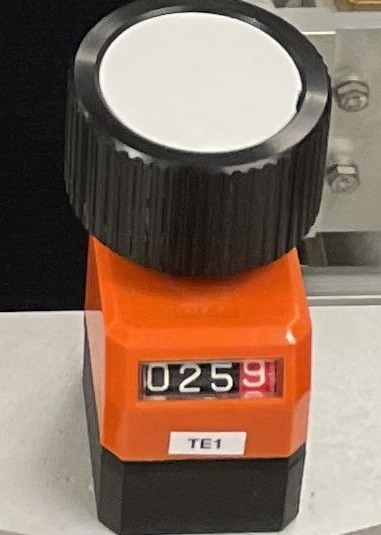

Text: 0259, Confidence: 0.99
Text: TE1, Confidence: 0.99

Processing: gauge-4.jpeg
[2025/01/15 02:34:13] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.04598188400268555
[2025/01/15 02:34:13] ppocr DEBUG: cls num  : 2, elapsed : 0.008910179138183594
[2025/01/15 02:34:13] ppocr DEBUG: rec_res num  : 2, elapsed : 0.1444227695465088


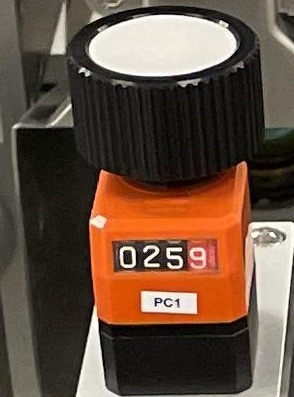

Text: 0259, Confidence: 1.00
Text: PC1, Confidence: 0.94

Processing: gauge-8.jpeg
[2025/01/15 02:34:13] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.013271808624267578
[2025/01/15 02:34:13] ppocr DEBUG: cls num  : 2, elapsed : 0.009155035018920898
[2025/01/15 02:34:13] ppocr DEBUG: rec_res num  : 2, elapsed : 0.1452019214630127


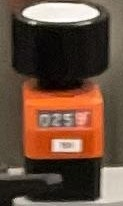

Text: 025, Confidence: 0.66


In [3]:
folder_path = "./images"
results = process_folder(folder_path)

In [ ]:
# image_path = "./images/gauge-1.jpeg"
# read_digital_display(image_path)
# image = Image.open(image_path)
# display(image)